In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import seaborn as sns

In [2]:
# Load all results from the the different classifiers
score_active_probing = pd.read_pickle("Mice_data/Score_mulitLabel_classifier_active_probing")

empircal_chance_level = pd.DataFrame({'Animal':score_active_probing['Animal'],"Accuracy":score_active_probing['chance level'],'Classifier':'Emprical Chance Level'})

score_passive_metric = pd.read_pickle("Mice_data/Score_mulitLabel_classifier_passive_metric")

score_combined = pd.read_pickle("Mice_data/Score_mulitLabel_combined")

In [3]:
# Combined all scores in a single Dataframe for plotting
plot_df = pd.concat([score_active_probing,score_passive_metric,score_combined,empircal_chance_level])

In [4]:
animals_multi = ["Ent_CamK2_09","Ent_CamK2_10","Ent_CamK2_11","Ent_CamK2_15","Ent_CamK2_16","Ent_CamK2_34","Ent_CamK2_40","Ent_CamK2_42",]
all_animals = ["Ent_CamK2_03","Ent_CamK2_04","Ent_CamK2_06","Ent_CamK2_09","Ent_CamK2_10","Ent_CamK2_11","Ent_CamK2_15","Ent_CamK2_16",
           "Ent_CamK2_34","Ent_CamK2_39","Ent_CamK2_40","Ent_CamK2_42",
           "Ent_CamK2_54","Ent_CamK2_55","Ent_CamK2_56","Ent_CamK2_57", "Ent_CamK2_58"]#

# Keep only a subset of animals (animals_multi is the one with both PTZ and Dz conditions)
mask = np.isin(plot_df['Animal'], all_animals)
plot_df = plot_df.loc[mask,:]

(0.0, 1.0)

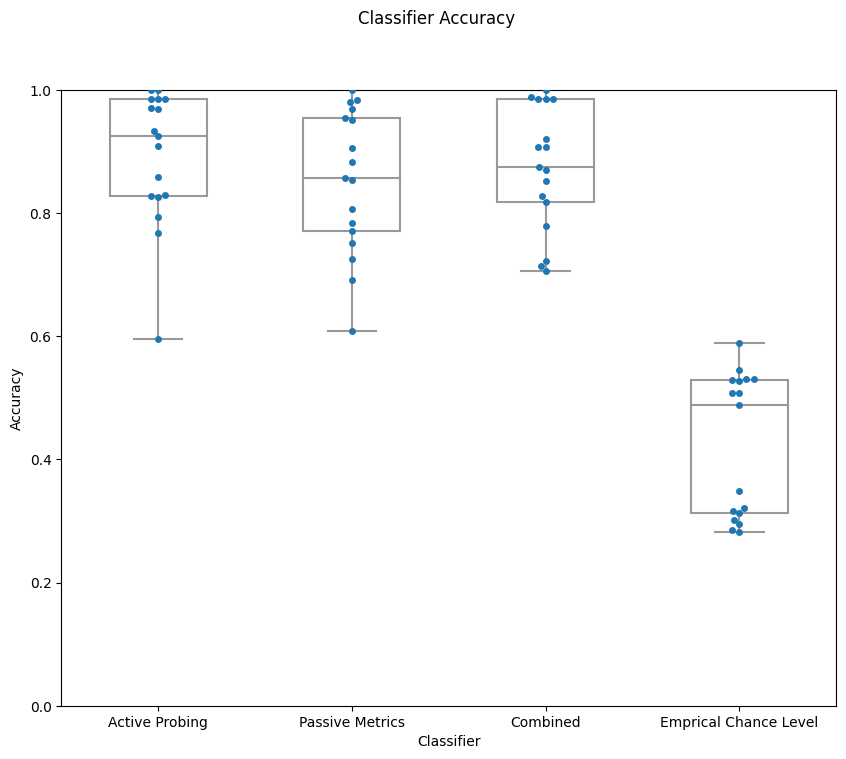

In [5]:
# Plot scores of each classifier
animals = plot_df['Animal'].unique()
title = 'Classifier Accuracy'
fig = plt.figure(title, figsize=(10, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
sns.boxplot(ax=ax1,data=plot_df, x="Classifier", y="Accuracy", orient='v',color='white', width=.5)
sns.swarmplot(ax=ax1,data=plot_df, x="Classifier", y="Accuracy")
ax1.set_ylim(bottom=0, top=1)

In [6]:
# Load results from each passive metrics on its own
score_single_passive_metrcis = pd.read_pickle("Mice_data/Score_passive_metrics")

# Keep only a subset of animals (animals_multi is the one with both PTZ and Dz conditions)
mask = np.isin(score_single_passive_metrcis['Animal'], animals_multi)
plot_df = score_single_passive_metrcis.loc[mask,:]

(0.0, 1.0)

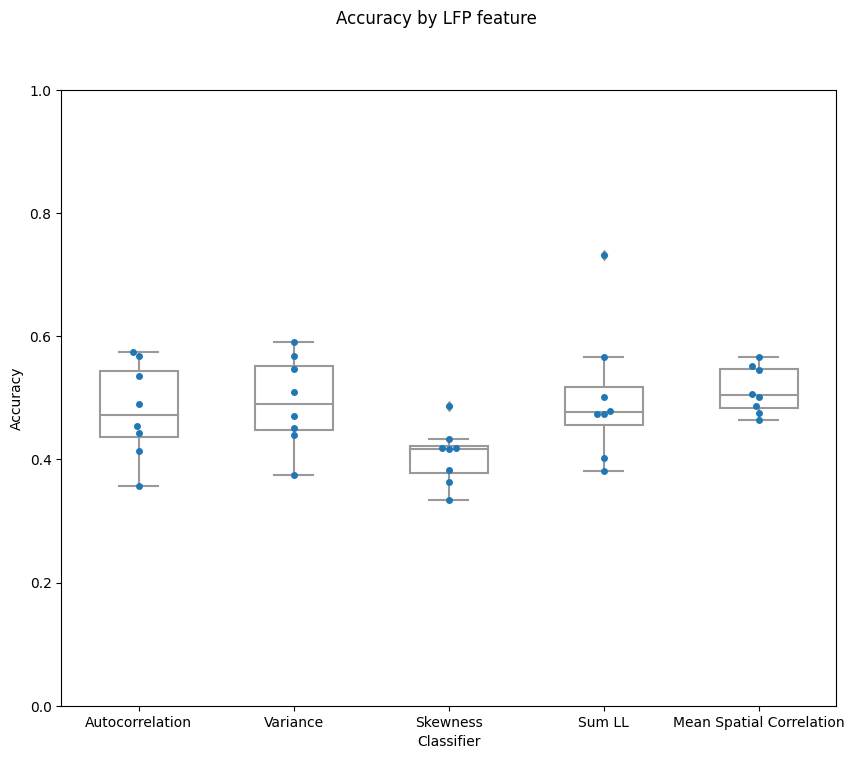

In [7]:
title = 'Accuracy by LFP feature'
fig = plt.figure(title, figsize=(10, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
sns.boxplot(ax=ax1, data=plot_df, x="Classifier", y="Accuracy", orient='v', color='white', width=.5)
sns.swarmplot(ax=ax1, data=plot_df, x="Classifier", y="Accuracy")
ax1.set_ylim(bottom=0, top=1)

In [8]:
# Load score for Single pulse classifier using as sliding window
sliding_SP_classifier = pd.read_pickle('Mice_data/Score_mulitLabel_classifier_SP_sliding')

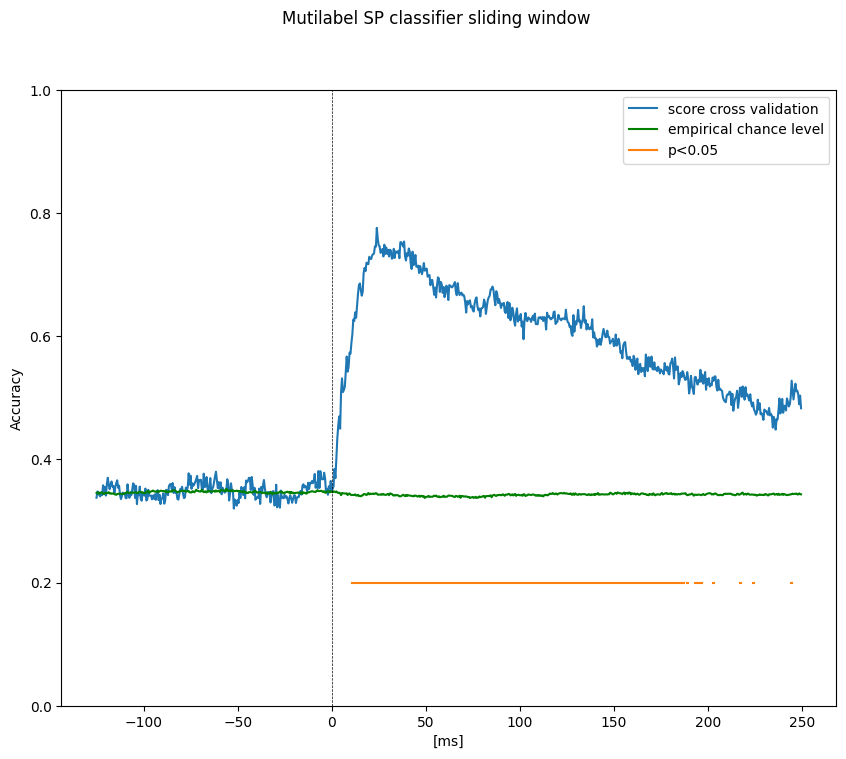

In [10]:
time_window_ms = 250
Sampling_freq = 2000
x = np.arange(-time_window_ms / 2, time_window_ms, 1000 / Sampling_freq)

# Mean across annimals
score_cv = np.mean(sliding_SP_classifier['Accuracy'].values.tolist(),axis=0)
emprical_chance = np.mean(sliding_SP_classifier['chance level'].values.tolist(),axis=0)
p_value_tp = np.mean(sliding_SP_classifier['p-value'].values.tolist(),axis=0)

# Calculate significant timepoints
index_p = np.where(p_value_tp < 0.05)[0]
signif = np.empty((len(x)))
signif[:] = np.NaN
signif[index_p] = 0.2

# Plot scores across timepoints
title = 'Mutilabel SP classifier sliding window'
fig = plt.figure(title, figsize=(10, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
ax1.plot(x, score_cv, label='score cross validation')
ax1.plot(x, emprical_chance, label='empirical chance level', color='g')
ax1.plot(x, signif, label='p<0.05')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('[ms]')
ax1.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
ax1.set_ylim(0,1)
ax1.legend()
